In [8]:
import pandas as pd
import numpy as np
import researchpy as rp
import math
import seaborn as sns
import matplotlib.pyplot as plt

## Organizing dataframe
### Data Cleaning

In [9]:
# Read in data for biological sciences department
df_bio_rec = pd.read_csv("capes/bio_sci_capes.csv", usecols= ['Instructor','Rcmnd Instr'])
df_bio_grade = pd.read_csv("capes/bio_sci_capes.csv", usecols= ['Instructor','Avg Grade Expected', 'Avg Grade Received'])


# Change percent reccomend to decimal
df_bio_rec['Rcmnd Instr'] = df_bio_rec['Rcmnd Instr'].str.rstrip('%').astype('float') / 100.0

# Array with women professors
women_profs = ['Ackerman, Susan', 'Dutton, Rachel Janelle', 'Bloodgood, Brenda Laurie', 'Butler, Madeline', 'Chilukuri, Lakshmi N', 'Cleland, Elsa Eleanor', 'Cook-Andersen, Heidi Leigh', 'Cooper, Kimberly Lynn', 'Dutton, Rachel Janelle', 'Farley, Emma Kristen', 'French, Kathleen Ann', 'Glasgow, Stacey Marie', 'Golden, Susan S.', 'Goldrath, Ananda', 'Halpain, Shelley', 'Huffaker, Alisa', 'Jin, Yishi', 'Jones, Katherine A.', 'Juavinett, Ashley Lauren', 'Karlseder, Jan', 'Kiger, Amy', 'Kurle, Carolyn M.', 'Lauberth, Shannon Marie', 'Leutgeb, Jill K.', 'Markow, Therese A.', 'McDonnell, Lisa Marie', 'Meaders, Clara Leigh', 'Mel, Stephanie', 'Niwa, Maho', 'Oegema, Karen', 'Owens, Melinda Tsao-Ying', 'Pasquinelli, Amy', 'Pekkurnaz Banghart, Gulcin', 'Petrie, Katherine Lynn','Pillus, Lorraine', 'Pogliano, Kit J.', 'Reinagel, Pam', 'Rennison, Diana', 'Smith, Laurie', 'Stockwell, Sarah R', 'Su, Chih-Ying', 'Tour, Ella', 'Troemel, Emily Ruth', 'Villa Rodriguez, Elizabeth', 'Wienhausen, Gabriele', 'Yelon, Deborah', 'Zhang, Dong-Er', 'Zuniga, Elina I']

In [10]:
# Drop null values
df_bio_rec = df_bio_rec.dropna()
df_bio_grade = df_bio_grade.dropna()

# Rename columns for convenience
df_bio_rec = df_bio_rec.rename(columns={"Instructor":"prof", "Rcmnd Instr":"rec_percent", "Gender": "gender"})
df_bio_grade = df_bio_grade.rename(columns={"Instructor":"prof","Avg Grade Expected": "expected", "Avg Grade Received": "received"})

In [11]:
df_bio_rec.head()

,prof,rec_percent
0,"Hui, Enfu",0.965
1,"Zhao, Yunde",0.786
2,"Feng, Gen-Sheng",0.654
3,"Coleman, Aaron B.",1.000
4,"Soowal, Lara",0.875


In [12]:
df_bio_grade.head()

,prof,expected,received
0,"Hui, Enfu",B+ (3.51),B+ (3.50)
1,"Zhao, Yunde",B (3.16),B+ (3.52)
2,"Feng, Gen-Sheng",B (3.18),A- (3.72)
3,"Coleman, Aaron B.",B+ (3.52),B+ (3.46)
4,"Soowal, Lara",B- (2.93),B (3.04)


In [13]:
# Split function to get grade numerical value
def split_func(x) : 
    return(float(x.split('(')[1][:-1]))

In [15]:
# Split expected and received in order to extract grade value as decimal
df_bio_grade['value_e'] = df_bio_grade['expected'].apply(split_func)
df_bio_grade['value_r'] = df_bio_grade['received'].apply(split_func)
df_bio_grade = df_bio_grade.drop(columns=['expected', 'received'])
df_bio_grade = df_bio_grade.rename(columns={'value_e':'expected', 'value_r':'received'})

In [16]:
# Average out reccomend percent for all classes professor has taught
df_bio_rec_avg = df_bio_rec.groupby('prof', as_index=False).mean()

# Average out expected & recieved grade for all classes professor has taught
df_bio_grade = df_bio_grade.groupby('prof', as_index=False).mean()

# Add column for gender for professor
df_bio_rec_avg['gender'] = np.where(df_bio_rec_avg['prof'].isin(women_profs), "W", "M")
df_bio_grade['gender'] = np.where(df_bio_grade['prof'].isin(women_profs), "W", "M")

In [17]:
df_bio_rec_avg.head()

,prof,rec_percent,gender
0,"Ackerman, Susan",0.849500,W
1,"Adomako, Marie Antonia",0.943000,M
2,"Akbari, Omar Sultan",0.937200,M
3,"Alfonso, Stephanie Isabel",0.794333,M
4,"Allen, Eric",0.987357,M


In [18]:
df_bio_grade.head()

,prof,expected,received,gender
0,"Ackerman, Susan",3.670000,3.605000,W
1,"Adomako, Marie Antonia",3.350000,3.160000,M
2,"Akbari, Omar Sultan",3.442500,3.305000,M
3,"Alfonso, Stephanie Isabel",3.230000,2.826667,M
4,"Allen, Eric",3.740714,3.613571,M


### Descriptive Stats

#### Bio Recommendation

In [9]:
df_bio_rec_avg['gender'].value_counts()

M    265
W     47
Name: gender, dtype: int64

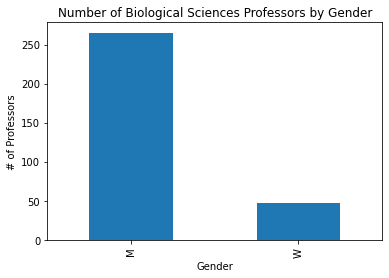

In [10]:
# Bar graphs with numbers of woman professors and men professors in Bio. Sci. department
ax_bio_count = df_bio_rec_avg['gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('# of Professors')
ax_bio_count.set_title('Number of Biological Sciences Professors by Gender')
f1 = plt.gcf()

Text(0, 0.5, 'Ratio Recommend Professor')

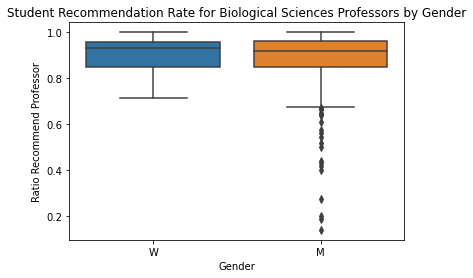

In [12]:
# Box Plots to see range of reccomendations for professors base on gender
ax_bio_rec_box = sns.boxplot(x="gender", y="rec_percent", data=df_bio_rec_avg)
ax_bio_rec_box.set_title('Student Recommendation Rate for Biological Sciences Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio Recommend Professor')

#### Expected vs Received Grade

Text(0, 0.5, 'Expected Grade for Professor')

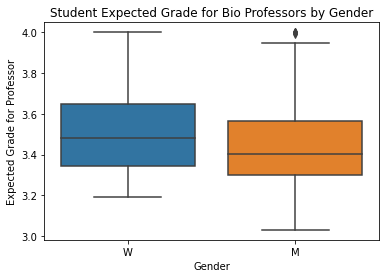

In [19]:
# Box Plots to see range of expected grades for professors base on gender
ax_bio_e_box = sns.boxplot(x="gender", y="expected", data=df_bio_grade)
ax_bio_e_box.set_title('Student Expected Grade for Bio Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Grade for Professor')

Text(0, 0.5, 'Expected Grade for Professor')

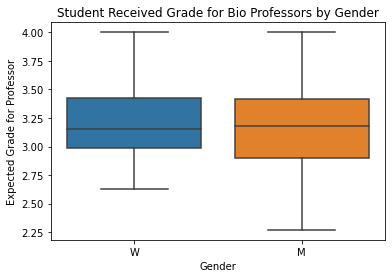

In [20]:
# Box Plots to see range of received grades for professors base on gender
ax_cse_r_box = sns.boxplot(x="gender", y="received", data=df_bio_grade)
ax_cse_r_box.set_title('Student Received Grade for Bio Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Grade for Professor')

### Z-test

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/z-test/

##### Defining recommended: > 75

In [13]:
#z-test
df_bio_rec_avg['gender'].value_counts()

M    265
W     47
Name: gender, dtype: int64

In [14]:
num_women = 188
num_men = 2214

#num women recommended/total women
p1 = 163/num_women
p2 = 1741/num_men
print("P1: ", p1)
print("P2: ", p2)

P1:  0.8670212765957447
P2:  0.7863595302619693


In [15]:
#overall proportion
p = (163+1741)/(188+2214)
print("P: ", p)

P:  0.7926727726894255


In [16]:
df_bio_rec_avg.loc[(df_bio_rec_avg['rec_percent'] > 0.75) & (df_bio_rec_avg['gender'] == "W")] 

,prof,rec_percent,gender
0,"Ackerman, Susan",0.849500,W
22,"Bloodgood, Brenda Laurie",0.934625,W
35,"Butler, Madeline",0.996900,W
41,"Chilukuri, Lakshmi N",0.940222,W
47,"Cleland, Elsa Eleanor",0.948947,W
57,"Cooper, Kimberly Lynn",0.949889,W
72,"Dutton, Rachel Janelle",0.953250,W
79,"Farley, Emma Kristen",0.950000,W
86,"French, Kathleen Ann",0.819121,W
94,"Glasgow, Stacey Marie",0.902750,W


In [17]:
#z-test formula
z = ((p1-p2)-0)/math.sqrt((p*(1-p))*((1/num_women)+(1/num_men)))
z

2.6192304518614566

In [18]:
# z-score associated with a 5% alpha level / 2 is 1.96.
# 2.619 > 1.96, reject the null hypothesis (so proportions are not the same)

### T-test

https://www.statisticshowto.com/probability-and-statistics/t-test/ 

https://www.statisticshowto.com/probability-and-statistics/t-distribution/independent-samples-t-test/

### *Hypothesis Testing*

$H_o$: There is no difference between whether a man or woman professor is reccomended

$H_a$: There is a difference between whether a man or woman proffesor is reccomended

In [19]:
rp.ttest(group1= df_bio_rec_avg['rec_percent'][df_bio_rec_avg['gender'] == "W"], group1_name= "Woman",
         group2= df_bio_rec_avg['rec_percent'][df_bio_rec_avg['gender'] == "M"], group2_name= "Man")

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Woman   47.0  0.903321  0.078561  0.011459   0.880255  0.926388
 1       Man  265.0  0.874659  0.143724  0.008829   0.857275  0.892043
 2  combined  312.0  0.878977  0.136211  0.007711   0.863804  0.894150,
             Independent t-test   results
 0  Difference (Woman - Man) =     0.0287
 1        Degrees of freedom =   310.0000
 2                         t =     1.3312
 3     Two side test p value =     0.1841
 4    Difference < 0 p value =     0.9079
 5    Difference > 0 p value =     0.0921
 6                 Cohen's d =     0.2107
 7                 Hedge's g =     0.2102
 8             Glass's delta =     0.3648
 9               Pearson's r =     0.0754)